## 1.  Importing Required Libraries

In [1]:
# Import Required Python Packages :

import warnings
warnings.filterwarnings('ignore')

# Setting up our enviroment
# Data Viz & Regular Expression Libraries :
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Scientific and Data Manipulation Libraries :
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import FastAI library
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os

## 2.  Load and view your data
### 2.1  Setting up path for training data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path=os.path.join('/content/drive/My Drive/RSS_JPG_RESIZED')

### 2.2  Data Loading For training

Things to be remember:

* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* Decide augmentations criteria

In [4]:

np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2,
                                    item_tfms=RandomResizedCrop(460, min_scale=0.75),
                                    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])


### 2.3  Data Explorations


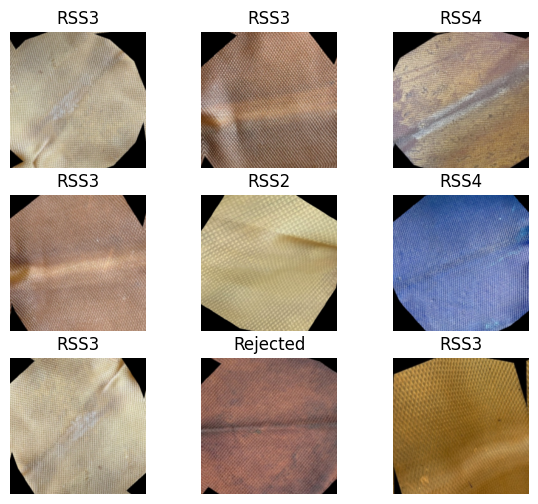

In [5]:
data.show_batch(figsize=(7, 6))

### 2.4  Print Classes present in the data
 How many classes are there in our dataset?

len(data.train_ds) — What is the size of our training dataset?

len(data.valid_ds) — What is the size of our validation dataset?**

In [6]:
print(len(data.vocab))
print(data.vocab)

print(len(data.train_ds))
print(len(data.valid_ds))

4
['RSS2', 'RSS3', 'RSS4', 'Rejected']
5242
1310


## 3.   Create and train a model

* We now use a pre-trained ResNet18 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.

* We use the **create_cnn()** function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.


### 3.1. Create Model

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy], model_dir = Path('/content/drive/My Drive'),path = Path("."))


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 121MB/s]


### 3.2  Training Neural Network

To find the perfect learning rates we can use the lr_find and recorder

SuggestedLRs(valley=1.0000000116860974e-07)

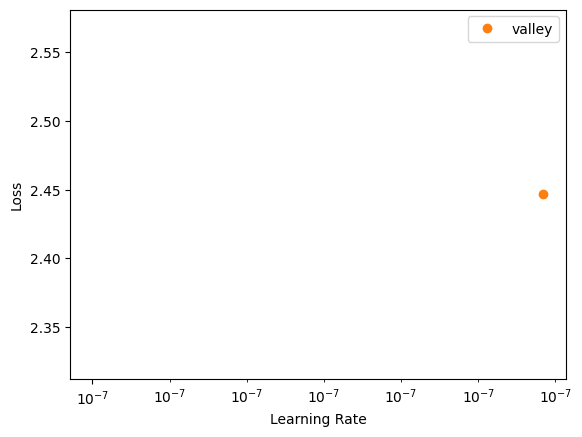

In [8]:
learn.lr_find( num_it=3)

In [11]:
lr1 = 1e-7
lr2 = 1e-7
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.617311,0.089475,0.991603,40:18
1,0.585675,0.131052,0.987023,39:36
2,0.502335,0.113907,0.989313,39:17
3,0.625421,0.097034,0.989313,39:12


## 4.  Interpret the results

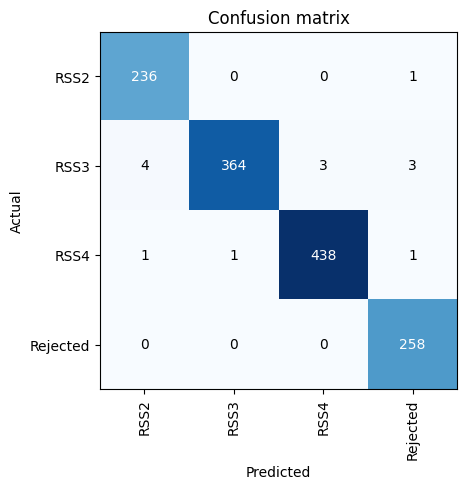

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## 5. Prediction using trained model

RSS3


<Axes: >

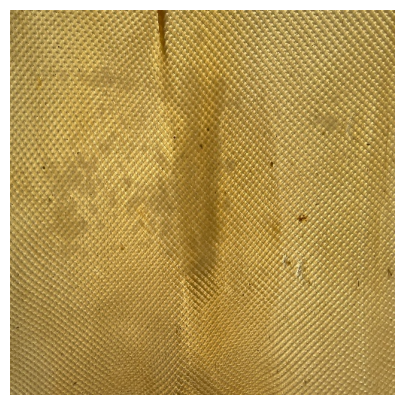

In [14]:
from fastai.vision.all import *
from PIL import Image
img_path=os.path.join('/content/drive/My Drive/RSS_JPG_RESIZED/RSS3/RSS3_6.jpg')
img = PILImage.create(img_path)
print(learn.predict(img)[0])
img.show()  # Display the imag

## Deploying your model (OPTIONAL)

When you are ready to put your model in production, export the minimal state of your Learner with:

In [15]:
pickle_file_path = os.path.join("/content/drive/My Drive/exportFinal.pkl")
with open(pickle_file_path, 'wb') as file:
    pickle.dump(learn, file)

In [ ]:
learn.model_dir = "/content/drive"
learn.save("stage-1",return_path=True)

In [17]:
from fastai import *
from fastai.vision import *
from PIL import Image
import pickle
from fastai.vision.all import *
from PIL import Image

learn = pickle.load(open("/content/drive/My Drive/exportFinal.pkl", "rb"))
# Specify the path to the image you want to predict
image_path = "/content/drive/My Drive/RSS_JPG/2/RSS2_4.jpg"

img = PILImage.create(image_path)
prediction = learn.predict(img)
print(learn.predict(img)[0])
# Get the predicted class label
predicted_class = prediction[0]
probabilities = prediction[2]


RSS2


## Sources
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](http://https://docs.fast.ai/)
